# CEEL82B Expt 8: Support Vector Machine

### Objective:

Understanding Support Vector Machine algorithm through building SVM algorithm in Python

### Importing libraries

In [114]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import missingno as msno
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
%matplotlib inline

## Using randomly generated dataset

Utility function to plot svc

In [115]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
    Z=svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv=svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths='1') 
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max) 
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [116]:
np.random.seed(5)
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] +1

Testing wether the data is linear or non-linear

Text(0, 0.5, 'X2')

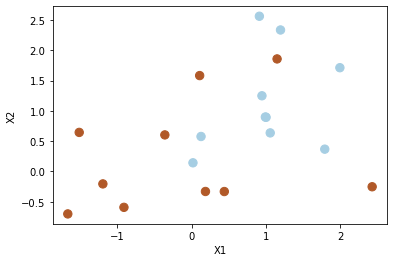

In [117]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

Clearly the data is not linearly seperable

In [118]:
svc = SVC(C=1, kernel='linear', probability=True) 
svc.fit(X, y)

SVC(C=1, kernel='linear', probability=True)

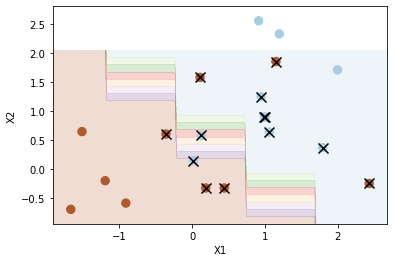

Number of support vectors:  13


In [119]:
plot_svc(svc, X, y)

In [120]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8])

Using a smaller cost

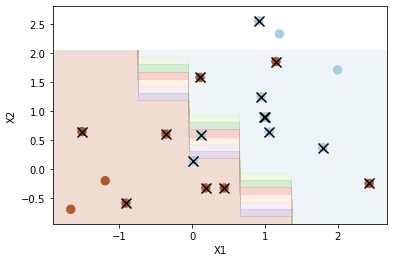

Number of support vectors:  16


In [121]:
svc2 = SVC(C=0.1, kernel='linear', probability=True) 
svc2.fit(X, y)
plot_svc(svc2, X, y)

Cost reduction leads to wider margin and more number of support vectors

In [122]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10)
scoring = clf.fit(X, y)

In [124]:
clf.best_params_

{'C': 0.001}

In [125]:
clf.best_estimator_

SVC(C=0.001, kernel='linear')

Best parameter value is 0.001

Using a randomly generated test dataset to test model predictions

In [126]:
np.random.seed(1)
X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

In [127]:
svc2 = SVC(C=0.001, kernel='linear', probability=True)
svc2.fit(X, y)
y_pred = svc2.predict(X_test)

In [128]:
without_kernel = confusion_matrix(y_test, y_pred)
pd.DataFrame(without_kernel, index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


With this value of c, 14 of the test observations are correctly classified

### Generating Linearly Seperable data

In [129]:
X_test[y_test == 1] = X_test[y_test == 1] -1

Text(0, 0.5, 'X2')

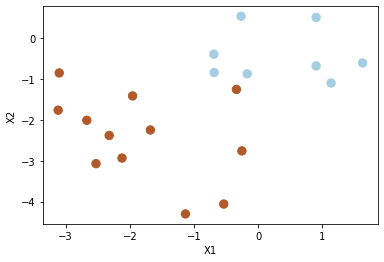

In [130]:
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

We fit the support vector classifier and plot the resulting hyperplane, using a very large value of cost so that no observations are misclassified

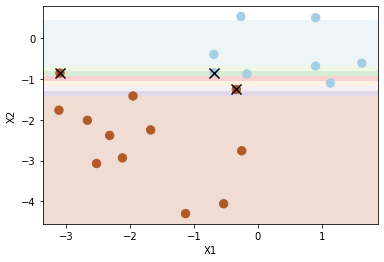

Number of support vectors:  3


In [131]:
svc3 = SVC(C=1e5, kernel='linear', probability=True) 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

We observe that the margin is very narrow and the number of SV required are 3

It seems likely that this model will perform poorly on test data.

Trying a smaller value of cost:

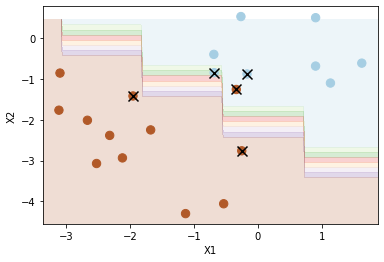

Number of support vectors:  5


In [132]:
svc4 = SVC(C=1, kernel='linear', probability=True) 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

We obtain a much wider margin and make use of 5 SVs

There's a much better possibility of getting better test accuracy

### Using Kernels in SVM

Text(0, 0.5, 'X2')

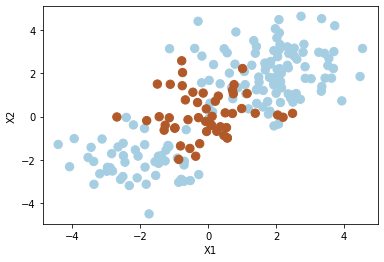

In [133]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,random_state=1)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

Looking at the data distribution, we try using Radial kernel with γ=1

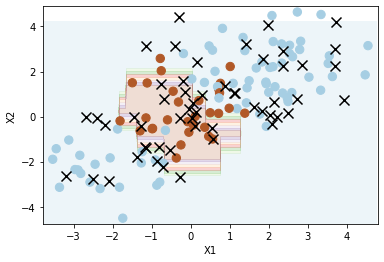

Number of support vectors:  57


In [134]:
svm = SVC(C=1.0, kernel='rbf', gamma=1, probability=True) 
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

If we increase the value of cost, we can reduce the number of training errors

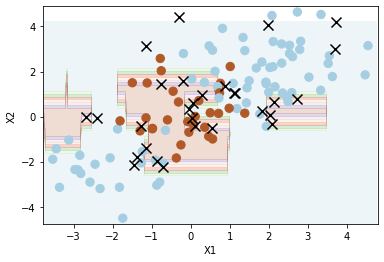

Number of support vectors:  30


In [135]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0, probability=True) 
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

We see that there's now an irregular decision boundary that seems to be at risk of overfitting the data

### Cross Validation

We  perform cross-validation using GridSearchCV() to select the best choice of γ and cost for an SVM with a radial kerne

In [136]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
'gamma': [0.5, 1,2,3,4]}]

clf = GridSearchCV(SVC(kernel='rbf', probability=True), tuned_parameters, cv=10)
clf.fit(X_train, y_train)

clf.best_params_

{'C': 10, 'gamma': 4}

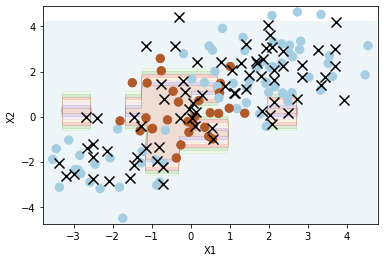

Number of support vectors:  77
Score: 0.82


In [137]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(f"Score: {clf.best_estimator_.score(X_test, y_test)}")

### Confusion Matrix

In [138]:
print("Confusion Matrix")
with_kernel = confusion_matrix(y_test, clf.best_estimator_.predict(X_test))
pd.DataFrame(with_kernel, index=svc2.classes_, columns=svc2.classes_)

Confusion Matrix


,-1,1
-1,67,3
1,15,15


### ROC AUC curve

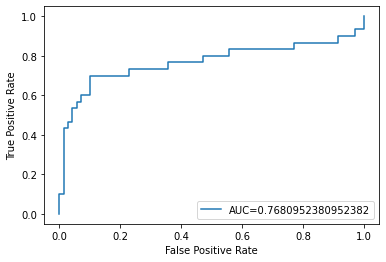

In [139]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# plot ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Pulsar dataset
### Exploring the data in the dataset

In [140]:
df = pd.read_csv('pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


### Removing nan's

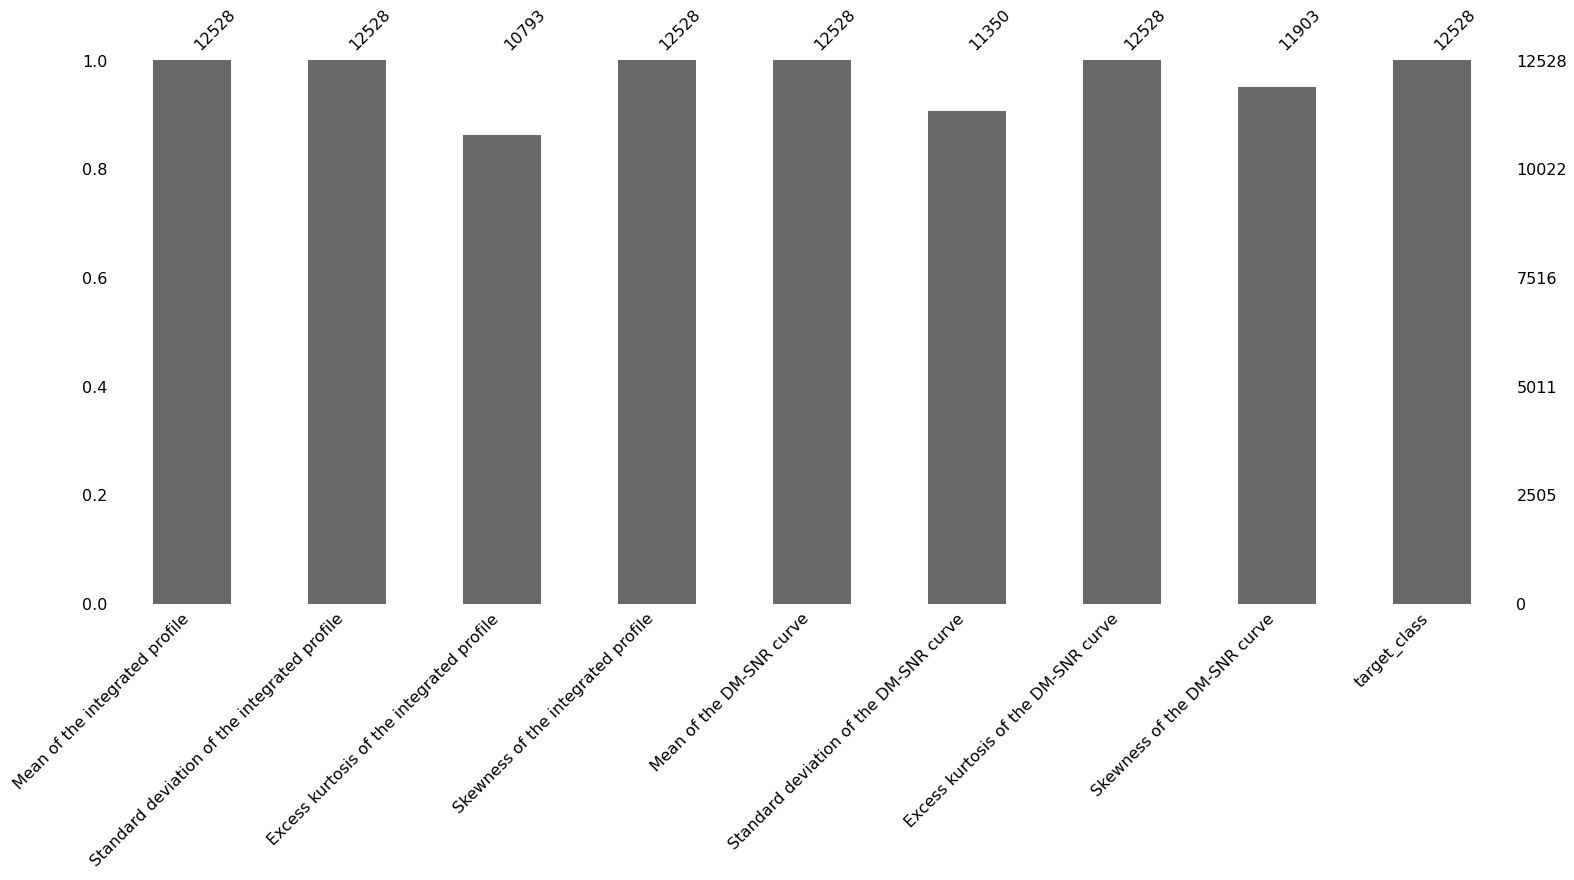

In [141]:
msno.bar(df)

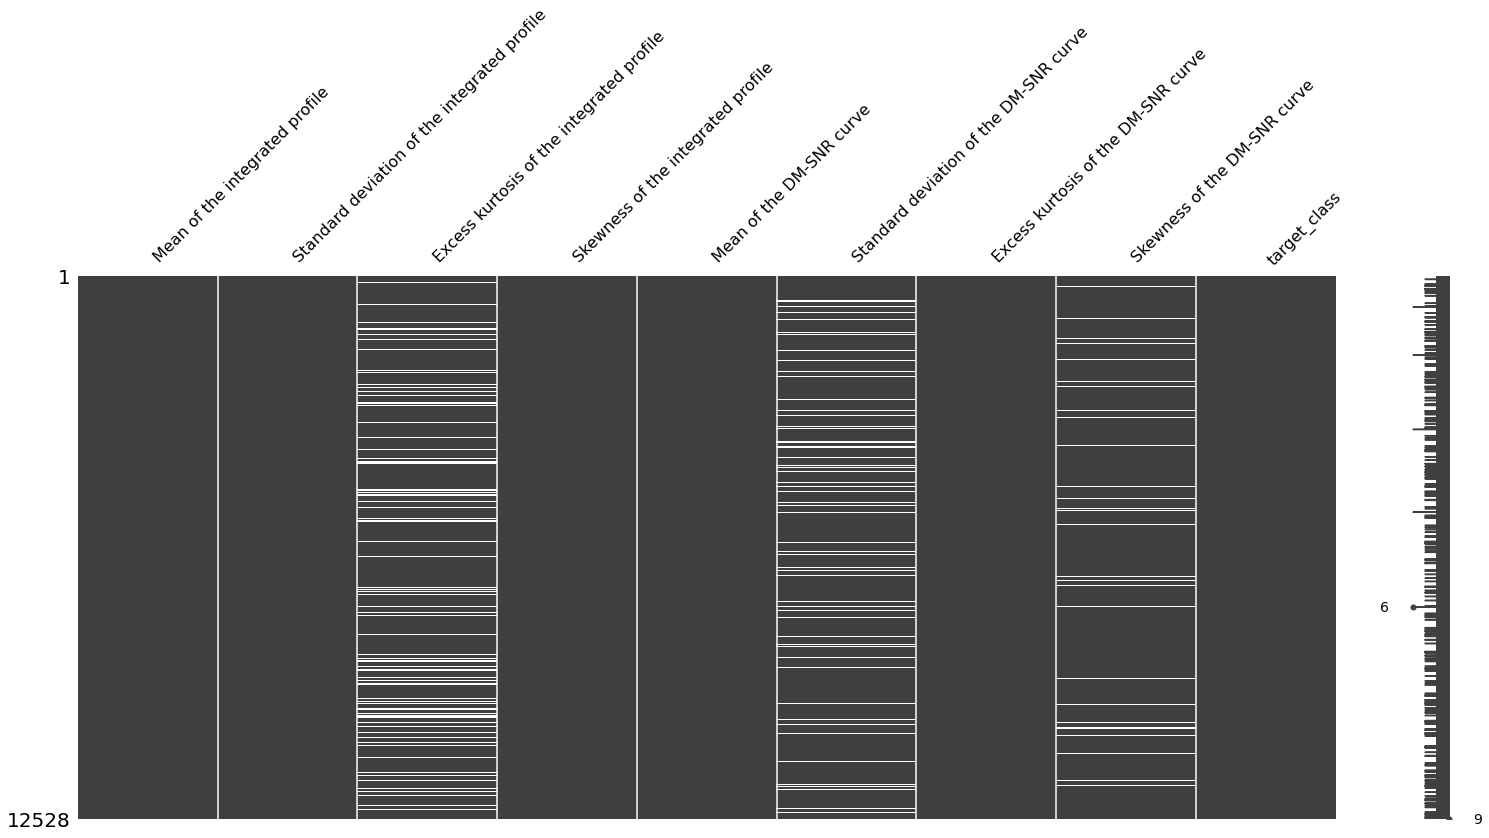

In [142]:
msno.matrix(df)

Only 3 columns have null values, that too all less than 20% and so we fill them using median values

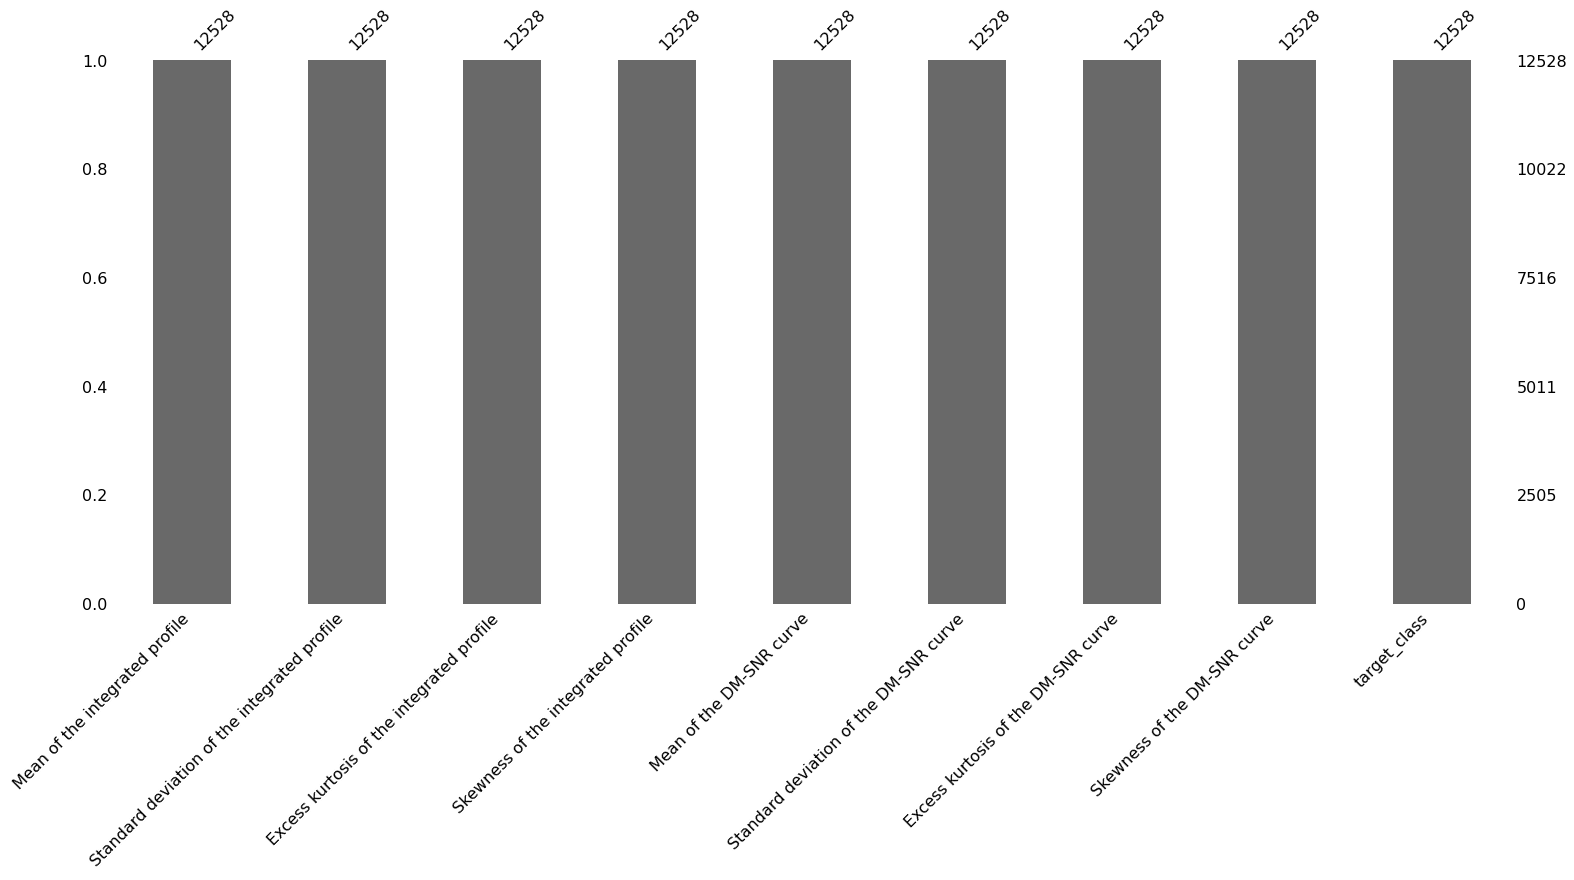

In [143]:
df_cleaned = df.fillna(df.median())
msno.bar(df_cleaned)

### Checking the data for outliers

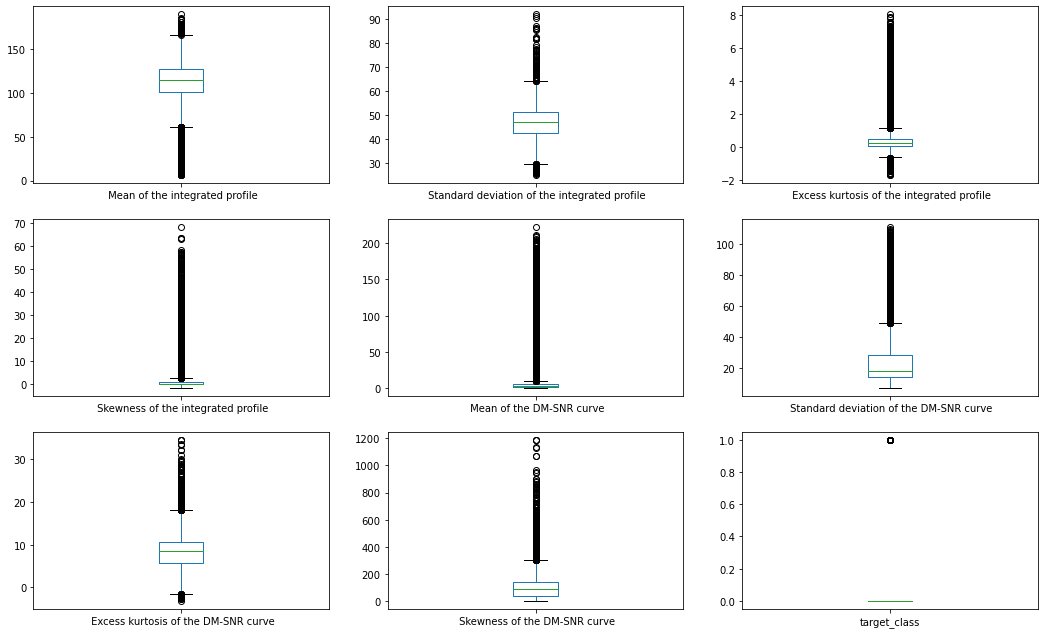

In [144]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

Thus we need to handle a lot of outliers 

In [145]:
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)
        data[col]=np.where(data[col]>upper_bound, upper_bound,
                       np.where(data[col]<lower_bound, lower_bound, data[col]))

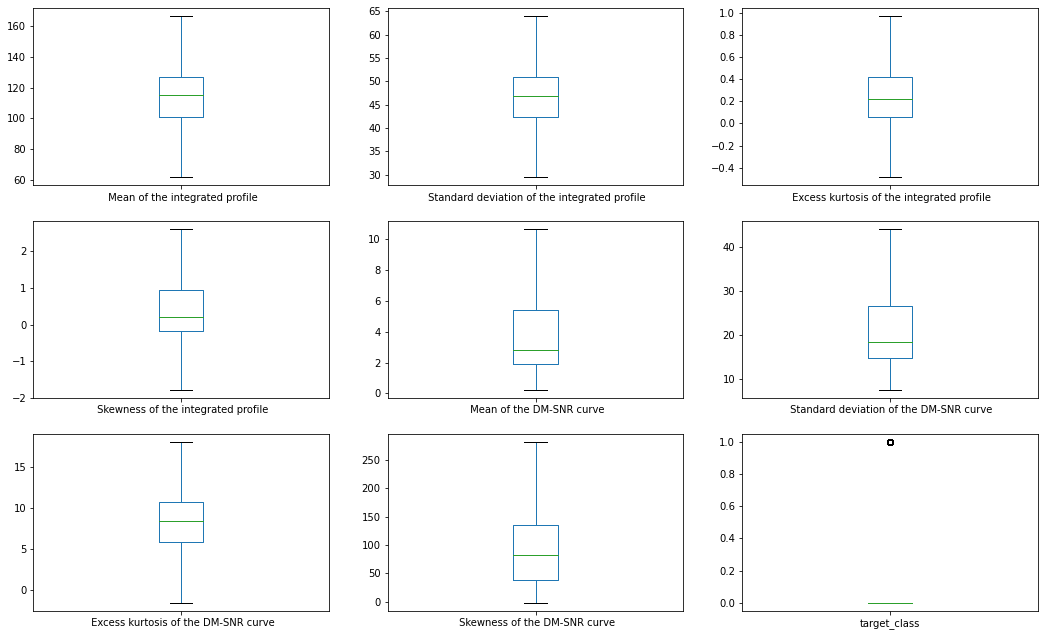

In [146]:
col = list(df_cleaned.columns)
col.remove("target_class")
remove_outliers(df_cleaned, col)
df_cleaned.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

In [74]:
X = df_cleaned.drop(['target_class'], axis = "columns").values
y = df_cleaned.target_class.values

### Handle Class Imbalance

C:\Users\aurko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


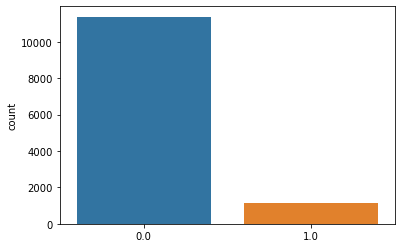

In [75]:
sns.countplot(y)

Dealing with class imbalance, using SMOTE resampling 

In [76]:
sm = SMOTE( random_state=42)
X, y = sm.fit_resample(X,y)

C:\Users\aurko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


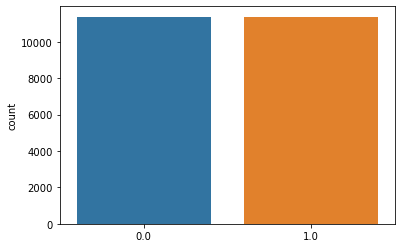

In [77]:
sns.countplot(y)

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 , random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [89]:
svm= SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
yhat_lin = svm.predict(X_test)
print('Accuracy Score of Support Vector Machine, Linear kernel: ', accuracy_score(y_test, yhat_lin))

Accuracy Score of Support Vector Machine, Linear kernel:  0.9305494505494506


In [90]:
print(classification_report(y_test, yhat_lin))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2305
         1.0       0.95      0.90      0.93      2245

    accuracy                           0.93      4550
   macro avg       0.93      0.93      0.93      4550
weighted avg       0.93      0.93      0.93      4550



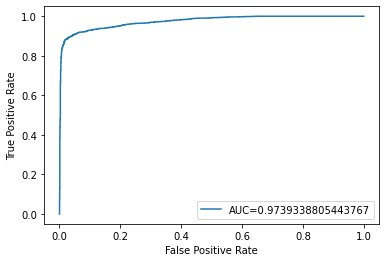

In [105]:
y_proba = svm.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_proba[:,1])
auc = roc_auc_score(y_test, y_proba[:,1])

# plot ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Using rbf kernel

In [111]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
yhat_rbf = svm.predict(X_test)
print('Accuracy Score of Support Vector Machine, RBF kernel: ', accuracy_score(y_test, yhat_rbf))

Accuracy Score of Support Vector Machine, RBF kernel:  0.9404395604395605


In [112]:
print(classification_report(y_test, yhat_rbf))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2305
         1.0       0.97      0.91      0.94      2245

    accuracy                           0.94      4550
   macro avg       0.94      0.94      0.94      4550
weighted avg       0.94      0.94      0.94      4550



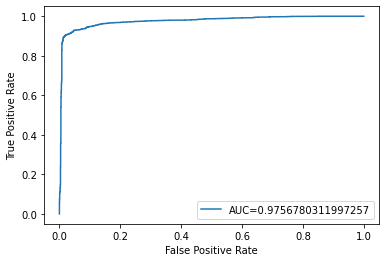

In [113]:
y_proba = svm.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_proba[:,1])
auc = roc_auc_score(y_test, y_proba[:,1])

# plot ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Conclusion
1. Thus, we saw an example case of SVM application on a random data and deliberately created a linear and non-linear data to apply SVM's linear and rbf kernels on it and see the plots to understand why the number of support vectors increases with decreasing C value.
2. We look at the Pulsar dataset which is a real dataset and we try to classify the data into 2 target classes based on the values of the rest of the columns, using two different SVM methods and compare it's results using various parameters like precision, recall, f1 score, accuracy, AUC etc. We first fill the missing values with their medians as the number of such rows are very little compared to the dataset.
3. Next we take care of the outliers and see that there are outliers in every column except the target class, and so we use inter quartile range to remove the outliers in the dataset. After that, we notice that there's class imbalance in the target class. Since, we are working with SVM that is sensitive to class imbalances, we apply the [SMOTE](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/) (Synthetic Minority Oversampling Technique) resampling to balance the classes. 
4. We then make a random 20-80 split on the data and Apply linear and rbf SVM kernels to find that rbf kernel works best in this scenario giving an AUC of 0.97, and having the precision, recall, f1 score, and accuracy scores in the range of 0.91-0.97, with each better than the linear by 0.1 across classes. This shows that the SVM (rbf kernel) performs better with less misclassifications and false positives than SVM (linear kernel) and gives 94% accuracy.